In [126]:
%matplotlib inline

In [241]:
import networkx as nx
import numpy as np
import random
import scipy
import pandas as pd
from matplotlib import pyplot as plt

from helpers import (
    flatten, 
    get_theoretical_kappa, 
    noise_level, 
    signed_layout,
    get_borderless_fig, 
    draw_nodes,
    draw_edges
)
from exp_helpers import run_pipeline
from data_helpers import make_polarized_graphs_fewer_parameters
from tqdm import tqdm

In [128]:
random.seed(12345)
np.random.seed(12345)

# relation of eta and fraction of noise edges

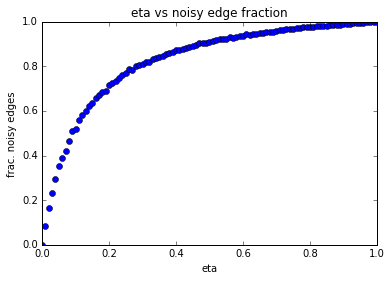

In [227]:
nc, k = 10, 10
nn = 0
eta_list = np.linspace(0, 1, 101)
noisy_edge_fraction = []
for eta in eta_list:
    g, _, _ = make_polarized_graphs_fewer_parameters(nc, nn, k, eta, verbose=0)
    ratio = noise_level(g)
    noisy_edge_fraction.append(ratio)
fig, ax = plt.subplots(1, 1)
ax.plot(eta_list, noisy_edge_fraction, 'o')

# coef = np.polyfit(eta_list, noisy_edge_fraction, deg=4)
# p = np.poly1d(coef)
# x = np.linspace(0, 1, 101)
# y = p(x)
# ax.plot(x, y, color='red')

ax.set_xlabel('eta')
ax.set_ylabel('frac. noisy edges')
ax.set_title('eta vs noisy edge fraction')

# effect of $\kappa$ on  graph with noisy edge fraction ~= 0.20

In [260]:
nc, k = 10, 10
nn = 0
eta = 0.1

g, true_comms, true_groupings = make_polarized_graphs_fewer_parameters(nc, nn, k, 0.03, verbose=1)
A = nx.adj_matrix(g, weight='sign')

print('|V|, |E|', g.number_of_nodes(), g.number_of_edges())
print('noisy node ratio: ', nn / g.number_of_nodes())
print('noisy edge ratio: ', noise_level(g))

internal_density 0.985
internal_neg_ratio 0.015228426395939085
#communities 10
comm#1 sizes: 10 10
comm#2 sizes: 10 10
comm#3 sizes: 10 10
comm#4 sizes: 10 10
comm#5 sizes: 10 10
comm#6 sizes: 10 10
comm#7 sizes: 10 10
comm#8 sizes: 10 10
comm#9 sizes: 10 10
comm#10 sizes: 10 10
---------------
num. good edges= 1842
num. noisy edges inside pairs= 23
num. noisy edges among pairs= 523
|V|, |E| 200 2388
noisy node ratio:  0.0
noisy edge ratio:  0.228643216080402


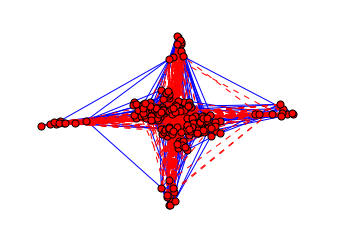

In [261]:
fig, ax = get_borderless_fig()
pos = signed_layout(g)
# draw_nodes(g, pos)
nx.draw_networkx_nodes(g, pos, node_size=50, ax=ax)
draw_edges(g, pos, ax=ax)

In [262]:
n_reps = 1
target_comm = np.random.choice(len(true_comms))        
v1 = np.random.choice(true_groupings[target_comm][0])
v2 = np.random.choice(true_groupings[target_comm][1])
seeds = [[v1], [v2]]


perf = []
for kappa in np.linspace(0, 1.0, 11):
    for i in range(n_reps):            
        res = run_pipeline(g, seeds, kappa, target_comm, true_comms, true_groupings)
        res['kappa'] = kappa
        perf.append(res)


WARN: m less than n, problem likely degenerate
beta= 0.17498739283913262
upperbound sqrt(opt_val)= 0.606167034317207
does upperbound hold? True
----------
WARN: m less than n, problem likely degenerate
beta= 0.16254491650813782
upperbound sqrt(opt_val)= 0.6257117713634395
does upperbound hold? True
----------
WARN: m less than n, problem likely degenerate
beta= 0.21338912133891214
upperbound sqrt(opt_val)= 0.6566504868064224
does upperbound hold? True
----------
WARN: m less than n, problem likely degenerate
beta= 0.21338912133891214
upperbound sqrt(opt_val)= 0.7119894068666311
does upperbound hold? True
----------
WARN: m less than n, problem likely degenerate
beta= 0.21338912133891214
upperbound sqrt(opt_val)= 0.7803620570090826
does upperbound hold? True
----------
WARN: m less than n, problem likely degenerate
beta= 0.21338912133891214
upperbound sqrt(opt_val)= 0.8558112076230124
does upperbound hold? True
----------
WARN: m less than n, problem likely degenerate
beta= 0.2133891213

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


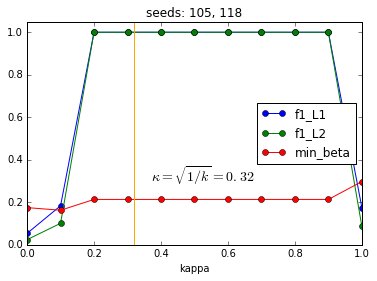

In [263]:
df = pd.DataFrame.from_records(perf)

agg_df = df[['kappa', 'f1_L1', 'f1_L2', 'min_beta']].groupby('kappa').mean()
agg_df.reset_index(level=0, inplace=True)

fig, ax = plt.subplots(1, 1)

seeds_str = ', '.join(map(str, flatten(seeds)))
agg_df.plot(
    x='kappa',
    y=['f1_L1', 'f1_L2', 'min_beta'],
    ylim=[0, 1.05],
    style='-o',
    title='seeds: {}'.format(seeds_str),
    ax=ax
)

theoretical_kappa = get_theoretical_kappa(
    true_comms[target_comm], 
    flatten(seeds),
    A
)

ax.axvline(x=theoretical_kappa, color='orange')
ax.text(
    theoretical_kappa+0.05,
    0.3,
    '$\kappa = \sqrt{{1 / k}}={:.2f}$'.format(theoretical_kappa),
    fontsize=14
)

# fig.savefig('figs/effect-of-kappa/seeds-{}.png'.format(seeds_str))

# look closer at specific result

WARN: m less than n, problem likely degenerate
rank is 199
is rank one?  False
best_t: 3.5717704441942757e-06
comm1: [100 101 102 103 104 105 106 107 108 109]
comm2: [110 111 112 113 114 115 116 117 118 119]
nodes ordered by x_opt (asc):
[105 103 104 108 107 109 100 101 106 102  55 139  89 198  53  73   5  74
  71  78  77  56  57  92 192  70 142  80  43 143  79 174 130  72 134 149
 133 131  75 193 136  97 179  54  50  52 195 156 153  51 162 132  99  18
   9 190  24  15  10  31 187 196 197 194 199 181 186  40  14  44  35  30
  47  13 124  34  19  82  88  85  84  16  83  81  17 140  11 146  38  90
 164 155 176 148 166  61 160 167 169 157 144 123  36  87  59 163  37 165
 175  76 150 137 158 170  20  67 135 138  48  22 185  91   1  95   7 154
  49  94   0   8 178  96 191  21 188   2  98  29 183  25 180 182 189  27
  39   3  33 147  86  12  41  45  42 121 120  63 122  60  62 145 152 168
  93 151  68 159 127 141  64 161  65  58 173  66 172 171  28  26 184 177
  46 125  32 129 128   6 126   4

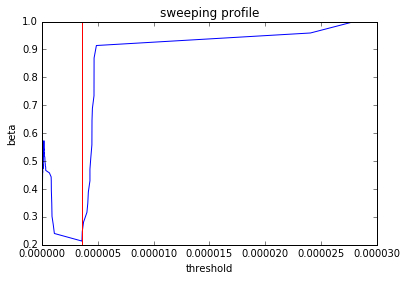

In [265]:
res = run_pipeline(
        g, seeds, 0.8, target_comm, true_comms, true_groupings,
        check_bound=False,
        show_sweep_plot=True,
        plot_returned_subgraph=False,
        plot_true_community=False,
        verbose=2
)

# evaluation under different $\eta$

- $\kappa$ is fixed to be $0.8$ (set from my "experience")
- **10** graphs has 6 pairs, each with 10+10 nodes
- $\eta \in \{0.01, \ldots, 0.09\}$ are considered
- for each noise level, experiments are repeated for **60** times (with random seed pairs) 
- average performance under each $\eta$ is reported 

In [307]:
avg_df.plot?

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


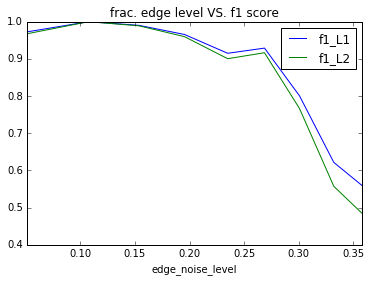

In [306]:
perf_df = pd.read_csv('outputs/result_synthetic_graphs.csv')
avg_df = perf_df[['f1_L1', 'f1_L2', 'eta', 'edge_noise_level']].groupby('eta').mean()

fig, ax = plt.subplots(1, 1)
avg_df.reset_index(level=0, inplace=True)

avg_df.plot(x='edge_noise_level', y=['f1_L1', 'f1_L2'], ax=ax)
ax.set_title('frac. edge level VS. f1 score')